<a href="https://colab.research.google.com/github/noh-yujeong/SPARTACODING-education-content/blob/main/2%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_02_%EB%8B%A4%ED%95%AD_%EB%85%BC%EB%A6%AC%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 와인 종류 예측 #
Q. 다항 논리회귀를 이용하여, 와인을 분류하기
와인의 도수, 산도, 색 등을 이용해서 3개의 class로 분류하기

In [ ]:
#1. 데이터 다운로드 받기
import os
os.environ['KAGGLE_USERNAME']='yujeongnoh'
os.environ['KAGGLE_KEY']='4daa67ac7c0888daf6fa77bbb559ae45'

!kaggle datasets download -d brynja/wineuci
!unzip wineuci.zip


wineuci.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  wineuci.zip
replace Wine.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Wine.csv                


In [ ]:
#2. 필요한 Package Import 하기
from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [ ]:
#3. 데이터 loading하기
df=pd.read_csv('Wine.csv')


df.head(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
#4. 전처리
#4-1. header 정보 채워넣기

df=pd.read_csv('Wine.csv',names=[
                                 'name',
                                 'alcohol',
                                 'malicAcid',
                                 'ash',
                                 'ashalcalinity',
                                 'magnesium',
                                 'totalPhenols',
                                 'flavanoids',
                                 'nonFlavanoidPhenols',
                                 'proanthocyanins',
                                 'colorIntensity',
                                 'hue',
                                 'od280_od315',
                                 'proline'
]
               )
df.head(10)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64


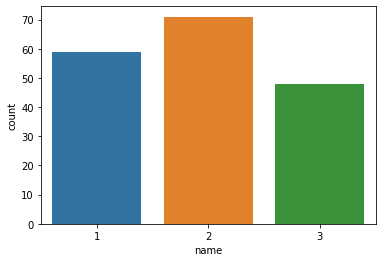

In [ ]:
sns.countplot(x=df['name'])
print(df.isnull().sum())

In [ ]:
#4. 전처리
#4-2. X,Y 데이터 분할
x_data=df.drop(columns=['name'],axis=1)
x_data=x_data.astype(np.float32)

y_data=df[['name']]
y_data=y_data.astype(np.float32)
y_data.head(5)

,name
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
#4. 전처리
#4-3. 표준화하기

scaler=StandardScaler()
x_data_scaled=scaler.fit_transform(x_data)
print(x_data.values[0])
print(x_data_scaled[0])

#4. 전처리
#4-4. one hot encoding

encoder=OneHotEncoder()
y_data_encoded=encoder.fit_transform(y_data).toarray()

print(y_data.values[0])
print(y_data_encoded[0])

#4. 전처리
#4-5. 학습, 검증 데이터 분할
x_train,x_val,y_train,y_val=train_test_split(x_data_scaled,y_data_encoded,test_size=0.2,random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
[ 1.5186119  -0.5622497   0.2320528  -1.1695931   1.9139051   0.8089973
  1.0348189  -0.65956306  1.2248839   0.2517168   0.3621771   1.8479197
  1.013009  ]
[1.]
[1. 0. 0.]
(142, 13) (36, 13)
(142, 3) (36, 3)


In [ ]:
model = Sequential([
  Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.02), metrics=['acc'])

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=20 # epochs 복수형으로 쓰기!
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
5/5 [==============================] - 0s 39ms/step - loss: 1.4747 - acc: 0.3169 - val_loss: 0.8830 - val_acc: 0.5833
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 0.7970 - acc: 0.6408 - val_loss: 0.5287 - val_acc: 0.8333
Epoch 3/20
5/5 [==============================] - 0s 6ms/step - loss: 0.4357 - acc: 0.8662 - val_loss: 0.3721 - val_acc: 0.8889
Epoch 4/20
5/5 [==============================] - 0s 6ms/step - loss: 0.2642 - acc: 0.9437 - val_loss: 0.2833 - val_acc: 0.9167
Epoch 5/20
5/5 [==============================] - 0s 6ms/step - loss: 0.1876 - acc: 0.9507 - val_loss: 0.2264 - val_acc: 0.9167
Epoch 6/20
5/5 [==============================] - 0s 6ms/step - loss: 0.1424 - acc: 0.9859 - val_loss: 0.1928 - val_acc: 0.9167
Epoch 7/20
5/5 [==============================] - 0s 9ms/step - loss: 0.1160 - acc: 0.9859 - val_loss: 0.1716 - val_acc: 0.9444
Epoch 8/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0990 - acc: 0.9859 - val_loss: 